In [ ]:
# Importación de las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

#### **Lectura de los datos desde TensorFlow - MNIST**

In [ ]:
# Construcción de las variables de entrada y salida
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Imprimiendo los resultados
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


#### **Aplicando las conversiones necesarias para pasar de 3d-array a 2d-array**

In [ ]:
# Creando separacion de los datos
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

n_train = 20000

x_train1 = x_train[0:n_train]
y_train1 = y_train[0:n_train]

In [ ]:
# Imprimiendo los resultados obtenidos
print (x_train.shape)
print (x_test.shape)
print (x_train1.shape)
print (y_train1.shape)

(60000, 784)
(10000, 784)
(20000, 784)
(20000,)


#### **Creación del primer modelo con Kernel Gaussiano**

Para este primer ejemplo vamos a utilizar la biblioteca GridSearch, la que nos va a ayudar a determinar cuáles son los mejores parámetros a utilizar en el hipertuneo, así podremos garantizar que nuestro algoritmo utilizará los mejores parámetros posibles. 

Al ser un proceso computacional costoso, vamos a hacerlo con solo aquellos paramétros que son más populares como: kernel, gamma, probability, C, y max_iter; ya que sino nuestro modelo tardará bastante tiempo ejecutándose. 

Por otro lado, se va a utilizar un cross validation de 3 para que se ejecute relativamente rápido, además se va a seguir la indicación de la tarea y para este kernel se utilzará un gamma "scale" y un probability "False" para acelerar el proceso de computo. 

In [ ]:
# Creando el modelo con Support Vector Machine
supportvm = SVC(random_state=0)

In [ ]:
# Creando estimador de parametros
param_grid = { 
    'kernel': ['rbf'],
    'gamma': ['scale'],
    'probability': [False],
    'C': [1, 10, 100, 500],
    'max_iter' :[1, 10, 100, 150]
}

In [ ]:
# Realizando Cross Validation con 3 y probando parametros
warnings.filterwarnings('ignore', 'Solver terminated early.*')
CV_svc = GridSearchCV(estimator=supportvm, param_grid=param_grid, cv= 3)
CV_svc.fit(x_train1, y_train1)

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid={'C': [1, 10, 100, 500], 'gamma': ['scale'],
                         'kernel': ['rbf'], 'max_iter': [1, 10, 100, 150],
                         'probability': [False]})

In [ ]:
# Comprobando cuales son los mejores parametros a utilizar
CV_svc.best_params_

{'C': 10,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 150,
 'probability': False}

In [ ]:
# Creando modelo con los mejores parametros identificados 
SVC_model1 = SVC(C = 10, gamma = 'scale', kernel = 'rbf', max_iter= 150, probability = False)

In [ ]:
# Ingestando los datos necesarios de training
SVC_model1.fit(x_train1, y_train1)

SVC(C=10, max_iter=150)

In [ ]:
# Prediciendo el valor del digito en el subset de testing
predicted = SVC_model1.predict(x_test)

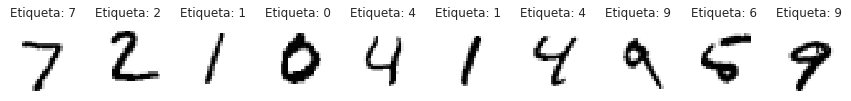

In [ ]:
# Creando función que retorne los valores predichos versus los valores reales
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for ax, image, label in zip(axes, x_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Etiqueta: %i' % label)

**Análisis:** se puede observar como utilizando la cantidad total de las 10000 imágenes del testing y utilizado el hipertuneo con GridSearch para entrenar el modelo, con un max_iter=150, random_state=0, C=10, gamma = 'scale', kernel = 'rbf', probability = False, se obtienen resultados bastante buenos, ya que se puede apreciar como de 10 predicciones en la imagen; el algoritmo logró acertar en 9 de ellas, es decir, solo un fallo. 

In [ ]:
# Imprimiendo resultados para ver el accuracy, precision y recall
print(
    f"Classification report for classifier {SVC_model1}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=10, max_iter=150):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.95      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000




**Análisis:** gracias al resumen que se nos muestra podemos ver que la predicción a nivel de precisión, que recordemos que nos responde la siguiente pregunta: ¿qué porcentaje del dígito que identifiquemos estará realmente correcto? (es decir, mide la calidad del modelo). En este caso podemos ver que el dígito que tiene el score más alto es el dígito 0, 1, 5, 6 y 9, con un 98% de acierto, es decir, el 98% de las veces el algoritmo será capaz de idenficar los números mencionados, por ende nunca se equivocará un 2% de las veces, mientras que las más bajas es 3 y 7 con un 96%, es decir, se equivocará en un 4% de las veces, aunque los resultados en general son bastante buenos. 


A nivel del recall (esta nos informa sobre la cantidad que el modelo es capaz de identificar) que recordemos que este responde a la pregunta: ¿qué porcentaje del dígito correcto somos capaces de identificar? Podemos ver que el mayor es el dígito 0 y 1 con un 99%, es decir, se equivocará en un 1% de las veces, mientras que el más bajo es el dígito 9 con un 94%, es decir para el dígito 9 conlleva una mayor cantidad de FN que el algoritmo predice incorrectamente (error tipo II). 

Finalmente podemos ver como el F1 que, recordemos que hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones, obtenemos que el que tiene mayores problemas idenficando es el dígito 9 con un 96%, mientras que el que idenfica de forma bastante aceptable es con el dígito 1 con un 99%, los demás se mantienen en un rango mayor a 97%.

Confusion matrix:



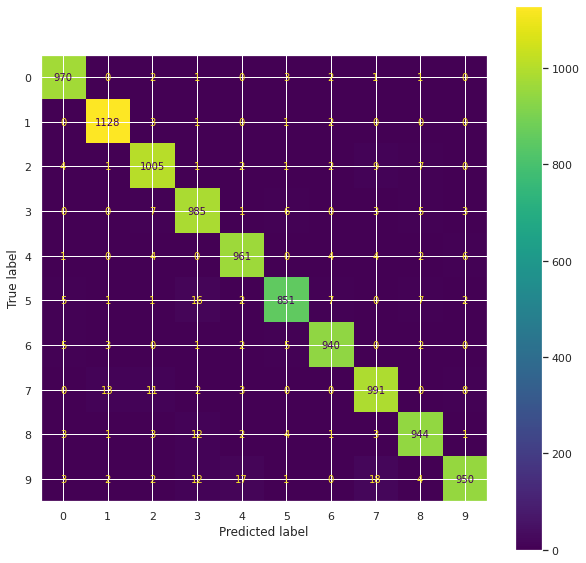



Confusion matrix:
[[ 970    0    2    1    0    3    2    1    1    0]
 [   0 1128    3    1    0    1    2    0    0    0]
 [   4    1 1005    1    2    1    2    9    7    0]
 [   0    0    7  985    1    6    0    3    5    3]
 [   1    0    4    0  961    0    4    4    2    6]
 [   5    1    1   16    2  851    7    0    7    2]
 [   5    3    0    1    2    5  940    0    2    0]
 [   0   13   11    2    3    0    0  991    0    8]
 [   3    1    3   12    2    4    1    3  944    1]
 [   3    2    2   12   17    1    0   18    4  950]]


In [ ]:
# Creando visualizacion de la matriz de confusion
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(SVC_model1, x_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

print("\n")

print(f"Confusion matrix:\n{confusion_matrix(y_test, predicted)}")

**Análisis:** podemos observar de forma rápida que el dígito 1 es en el que suceden la mayor cantidad de aciertos (tal y como indicamos en el punto anterior) seguido del 0, mientras que las predicciones más pobres son realizadas por el número 9.

#### **Creación del segundo modelo con Kernel Lineal**

In [ ]:
# Creando el modelo con Support Vector Machine
supportvm2 = SVC(random_state=0)

In [ ]:
# Creando estimador de parametros
param_grid = { 
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'probability': [False, True],
    'C': [1, 10, 100, 500],
    'max_iter' :[1, 10, 100, 150]
}

In [ ]:
# Realizando Cross Validation con 3 y probando parametros
warnings.filterwarnings('ignore', 'Solver terminated early.*')
CV_svc = GridSearchCV(estimator=supportvm2, param_grid=param_grid, cv= 3)
CV_svc.fit(x_train1, y_train1)

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid={'C': [1, 10, 100, 500], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear'], 'max_iter': [1, 10, 100, 150],
                         'probability': [False, True]})

In [ ]:
# Comprobando cuales son los mejores parametros a utilizar
CV_svc.best_params_

{'C': 1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 150,
 'probability': False}

In [ ]:
# Creando modelo con los mejores parametros identificados 
SVC_model2 = SVC(C = 1, gamma = 'scale', kernel = 'linear', max_iter= 150, probability = False)

In [ ]:
# Ingestando los datos necesarios de training
SVC_model2.fit(x_train1, y_train1)

SVC(C=1, kernel='linear', max_iter=150)

In [ ]:
# Prediciendo el valor del digito en el subset de testing
predicted = SVC_model2.predict(x_test)

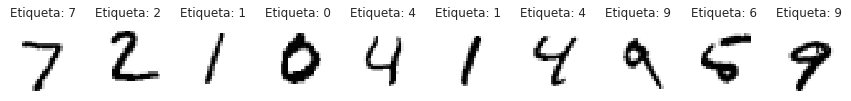

In [ ]:
# Creando función que retorne los valores predichos versus los valores reales
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for ax, image, label in zip(axes, x_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Etiqueta: %i' % label)

**Análisis:** se puede observar como utilizando una cantidad de 10000 "imágenes" para entrenar el modelo, C = 1, gamma = 'scale', kernel = 'linear', max_iter= 150, probability = False, se obtienen resultados bastante buenos de igual forma, ya que el algoritmo fue capaz de identificar correctamente casi todos los dígitos y se equivocó en uno solamente.

In [ ]:
# Imprimiendo resultados para ver el accuracy, precision y recall
print(
    f"Classification report for classifier {SVC_model2}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=1, kernel='linear', max_iter=150):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       980
           1       0.93      0.98      0.96      1135
           2       0.82      0.81      0.81      1032
           3       0.72      0.74      0.73      1010
           4       0.80      0.90      0.85       982
           5       0.78      0.74      0.76       892
           6       0.95      0.95      0.95       958
           7       0.86      0.69      0.76      1028
           8       0.74      0.74      0.74       974
           9       0.69      0.70      0.69      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000




**Análisis:** a nivel de precisión con un testing de 10000 observaciones, podemos ver que los digitos que tienen el score más alto es el dígito 6, con un 95% de acierto, es decir, el 95% de las veces el algoritmo será capaz de idenficar el número 6, por ende se equivocará un 5% de las veces, mientras que la más baja es la de 9 con un 69%, es decir, para el algoritmo es tarea fácil identificar el 6, pero no así el 9 (tiende a cometer más error tipo I) con los demás tiene un rango aceptable de aciertos.

A nivel del recall podemos ver que el mayor es el dígito 1 con un 96%, es decir, solo se equivocaría en un 4% de las veces, mientras que el más bajo es el dígito 9 con un 70%, es decir para el dígito 9 conlleva una mayor cantidad de FN que el algoritmo predice incorrectamente (error tipo II). 

Finalmente podemos ver como el F1 obtenemos que el que tiene mayores problemas idenficando es el dígito 9 con un 69%, mientras que el que idenfica de forma bastante buena es el 1 con un 96% respectivamente, los demás se mantienen en un rango entre 70 y 90%. 

Confusion matrix:



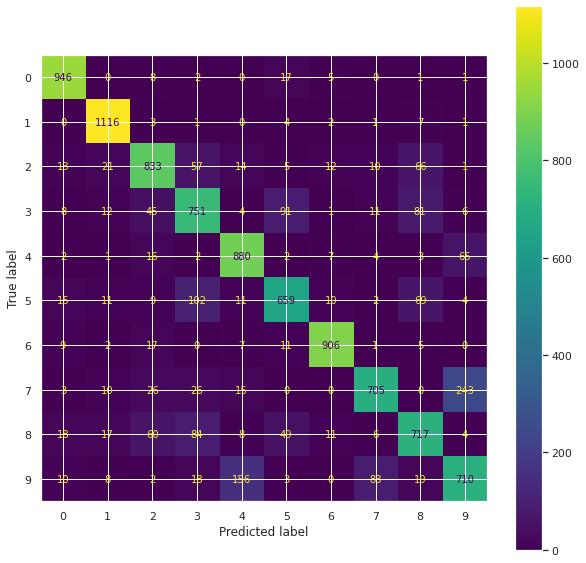



Confusion matrix:
[[ 946    0    8    2    0   17    5    0    1    1]
 [   0 1116    3    1    0    4    2    1    7    1]
 [  13   21  833   57   14    5   12   10   66    1]
 [   8   12   45  751    4   91    1   11   81    6]
 [   2    1   16    2  880    2    7    4    3   65]
 [  15   11    9  102   11  659   10    2   69    4]
 [   9    2   17    0    7   11  906    1    5    0]
 [   3   10   26   26   15    0    0  705    0  243]
 [  18   17   60   84    8   49   11    6  717    4]
 [  10    8    2   18  156    3    0   83   19  710]]


In [ ]:
# Creando visualizacion de la matriz de confusion
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(SVC_model2, x_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

print("\n")

print(f"Confusion matrix:\n{confusion_matrix(y_test, predicted)}")

**Análisis:** podemos observar de forma rápida que el dígito 1 es en el que suceden la mayor cantidad de aciertos (tal y como indicamos en el punto anterior), mientras que las predicciones más pobres son realizadas por el número 9. Estos resultados distan de los obtenidos con el kernel gaussiano, ya que, pero se nota que en este modelo hay una mayor oportunidad de mejora, así que podemos afirmar que de los dos modelos el que utilizamos con el kernel "RBF" es el que genera los mejores resultados. 

#### **Lectura de los datos desde TensorFlow - Fashion-MNIST**

In [ ]:
# Construcción de las variables de entrada y salida
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# Imprimiendo los resultados
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


#### **Aplicando las conversiones necesarias para pasar de 3d-array a 2d-array**

In [ ]:
# Creando separacion de los datos
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

n_train = 20000

x_train1 = x_train[0:n_train]
y_train1 = y_train[0:n_train]

In [ ]:
# Imprimiendo los resultados obtenidos
print (x_train.shape)
print (x_test.shape)
print (x_train1.shape)
print (y_train1.shape)

(60000, 784)
(10000, 784)
(20000, 784)
(20000,)


#### **Creación del primer modelo con Kernel Gaussiano**

Para este primer ejemplo vamos a utilizar la biblioteca GridSearch, la que nos va a ayudar a determinar cuáles son los mejores parámetros a utilizar en el hipertuneo, así podremos garantizar que nuestro algoritmo utilizará los mejores parámetros posibles. 

Al ser un proceso computacional costoso, vamos a hacerlo con solo aquellos paramétros que son más populares como: kernel, gamma, probability, C, y max_iter; ya que sino nuestro modelo tardará bastante tiempo ejecutándose. 

Por otro lado, se va a utilizar un cross validation de 3 para que se ejecute relativamente rápido, además se va a seguir la indicación de la tarea y para este kernel se utilzará un gamma "scale" y un probability "False" para acelerar el proceso de computo. 

In [ ]:
# Creando el modelo con Support Vector Machine
supportvm_modelo1 = SVC(random_state=0)

In [ ]:
# Creando estimador de parametros
param_grid = { 
    'kernel': ['rbf'],
    'gamma': ['scale'],
    'probability': [False],
    'C': [1, 10, 100, 500],
    'max_iter' :[1, 10, 100, 150]
}

In [ ]:
# Realizando Cross Validation con 3 y probando parametros
warnings.filterwarnings('ignore', 'Solver terminated early.*')
CV_svc = GridSearchCV(estimator=supportvm_modelo1, param_grid=param_grid, cv= 3)
CV_svc.fit(x_train1, y_train1)

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid={'C': [1, 10, 100, 500], 'gamma': ['scale'],
                         'kernel': ['rbf'], 'max_iter': [1, 10, 100, 150],
                         'probability': [False]})

In [ ]:
# Comprobando cuales son los mejores parametros a utilizar
CV_svc.best_params_

{'C': 10,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 150,
 'probability': False}

In [ ]:
# Creando modelo con los mejores parametros identificados 
SVC_model_3 = SVC(C = 10, gamma = 'scale', kernel = 'rbf', max_iter= 150, probability = False)

In [ ]:
# Ingestando los datos necesarios de training
SVC_model_3.fit(x_train1, y_train1)

SVC(C=10, max_iter=150)

In [ ]:
# Prediciendo el valor del digito en el subset de testing
predicted = SVC_model_3.predict(x_test)

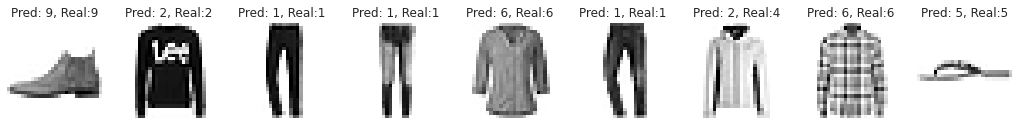

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, x_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

**Análisis:** se puede observar como utilizando una cantidad de 10000 "imágenes" para testing y C = 10, gamma = 'scale', kernel = 'rbf', max_iter= 150, probability = False, se obtienen resultados bastante buenos, ya que el algoritmo fue capaz de identificar correctamente casi todos los items de ropa y se equivocó en uno solamente, en este caso el algoritmo confundió una sudadera con una camisa de manga larga. 

In [ ]:
# Imprimiendo resultados para ver el accuracy, precision y recall
print(
    f"Classification report for classifier {SVC_model_3}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=10, max_iter=150):
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1000
           1       0.98      0.97      0.97      1000
           2       0.56      0.69      0.62      1000
           3       0.83      0.84      0.84      1000
           4       0.67      0.54      0.59      1000
           5       0.90      0.95      0.92      1000
           6       0.48      0.39      0.43      1000
           7       0.92      0.92      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000




**Análisis:** a nivel de precisión con testing de 10000, podemos ver que las imágenes que tienen el score más alto es la imagen con la etiqueta 1 (pantalón)con un 98% de acierto, es decir, el 98% de las veces el algoritmo será capaz de idenficar el pantalón, por ende se equivocará un 2% de las veces, mientras que la más baja es la de imagen con la etiqueta 6 (camisa/camiseta) con un 48%, es decir, para el algoritmo es tarea fácil identificar un pantalón, pero no así una camiseta/camisa (tiende a cometer más error tipo I) con los demás tiene un rango aceptable de aciertos.

A nivel del recall podemos ver que el mayor es el pantalon con un 97%, es decir, solo se equivocaría en un 3% de las veces, mientras que el más bajo es la camiseta/camisa con un 39%, es decir para el algoritmo identificar una camiseta/camisa conlleva una mayor cantidad de FN que el algoritmo predice incorrectamente (error tipo II). 

Finalmente podemos ver como el F1 obtenemos que el que tiene mayores problemas idenficando es la camisa de manga larga con un 43%, mientras que el que idenfica de forma bastante buena es el pantalón con un 97% respectivamente, los demás se mantienen en un rango entre 50 y 90%. 

Confusion matrix:



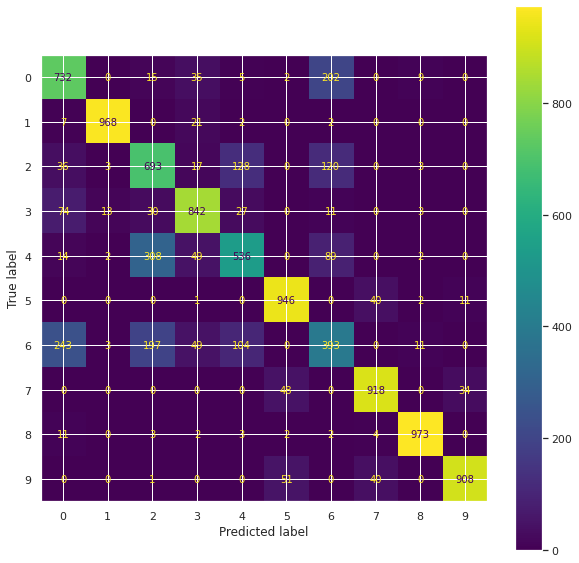



Confusion matrix:
[[732   0  15  35   5   2 202   0   9   0]
 [  7 968   0  21   2   0   2   0   0   0]
 [ 36   3 693  17 128   0 120   0   3   0]
 [ 74  13  30 842  27   0  11   0   3   0]
 [ 14   2 308  49 536   0  89   0   2   0]
 [  0   0   0   1   0 946   0  40   2  11]
 [243   3 197  49 104   0 393   0  11   0]
 [  0   0   0   0   0  48   0 918   0  34]
 [ 11   0   3   2   3   2   2   4 973   0]
 [  0   0   1   0   0  51   0  40   0 908]]


In [ ]:
# Creando visualizacion de la matriz de confusion
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(SVC_model_3, x_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

print("\n")

print(f"Confusion matrix:\n{confusion_matrix(y_test, predicted)}")

**Análisis:** podemos observar de forma rápida que la etiqueta 1 (pantalón) es en el que suceden la mayor cantidad de aciertos (tal y como indicamos en el punto anterior), mientras que las predicciones más pobres son realizadas por la etiqueta 6 (camisa/camiseta).

In [ ]:
# Creando el modelo con Support Vector Machine
supportvm3 = SVC(random_state=0)

In [ ]:
# Creando estimador de parametros
param_grid = { 
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'probability': [False, True],
    'C': [1, 10, 100, 500],
    'max_iter' :[1, 10, 100, 150]
}

In [ ]:
# Realizando Cross Validation con 3 y probando parametros
warnings.filterwarnings('ignore', 'Solver terminated early.*')
CV_svc = GridSearchCV(estimator=supportvm3, param_grid=param_grid, cv= 3)
CV_svc.fit(x_train1, y_train1)

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid={'C': [1, 10, 100, 500], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear'], 'max_iter': [1, 10, 100, 150],
                         'probability': [False, True]})

In [ ]:
# Comprobando cuales son los mejores parametros a utilizar
CV_svc.best_params_

{'C': 1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 150,
 'probability': False}

In [ ]:
# Creando modelo con los mejores parametros identificados 
SVC_model_4 = SVC(C = 1, gamma = 'scale', kernel = 'linear', max_iter= 150, probability = False)

In [ ]:
# Ingestando los datos necesarios de training
SVC_model_4.fit(x_train1, y_train1)

SVC(C=1, kernel='linear', max_iter=150)

In [ ]:
# Prediciendo el valor del digito en el subset de testing
predicted = SVC_model_4.predict(x_test)

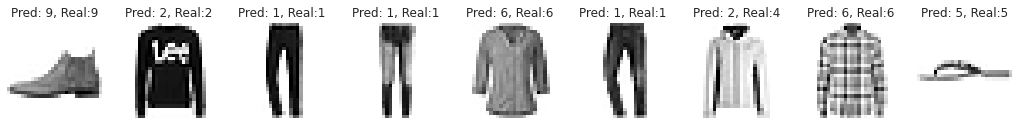

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, x_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

**Análisis:** se puede observar como utilizando una cantidad de 10000 "imágenes" para testing y C = 1, gamma = 'scale', kernel = 'linear', max_iter= 150, probability = False, se obtienen resultados bastante buenos, ya que el algoritmo fue capaz de identificar correctamente casi todos los items de ropa y se equivocó en uno solamente, en este caso el algoritmo confundió una sudadera con una camisa de manga larga. 

In [ ]:
# Imprimiendo resultados para ver el accuracy, precision y recall
print(
    f"Classification report for classifier {SVC_model_4}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=1, kernel='linear', max_iter=150):
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1000
           1       0.98      0.97      0.97      1000
           2       0.56      0.69      0.62      1000
           3       0.83      0.84      0.84      1000
           4       0.67      0.54      0.59      1000
           5       0.90      0.95      0.92      1000
           6       0.48      0.39      0.43      1000
           7       0.92      0.92      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000




**Análisis:** a nivel de precisión con testing de 10000 observaciones, podemos ver que las imágenes que tienen el score más alto es la imagen con la etiqueta 1 (pantalón)con un 98% de acierto, es decir, el 98% de las veces el algoritmo será capaz de idenficar el pantalón, por ende se equivocará un 2% de las veces, mientras que la más baja es la de imagen con la etiqueta 6 (camisa/camiseta) con un 48%, es decir, para el algoritmo es tarea fácil identificar un pantalón, pero no así una camiseta/camisa (tiende a cometer más error tipo I) con los demás tiene un rango aceptable de aciertos.

A nivel del recall podemos ver que el mayor es el pantalon con un 97%, es decir, solo se equivocaría en un 3% de las veces, mientras que el más bajo es la camiseta/camisa con un 39%, es decir para el algoritmo identificar una camiseta/camisa conlleva una mayor cantidad de FN que el algoritmo predice incorrectamente (error tipo II). 

Finalmente podemos ver como el F1 obtenemos que el que tiene mayores problemas idenficando es la camisa de manga larga con un 43%, mientras que el que idenfica de forma bastante buena es el pantalón con un 97% respectivamente.

Los resultados obtenidos en este segundo modelo no distan de los obtenidos con el kernel "RBF", entonces se puede utilizar uno u otro, aunque a nivel de tiempo para compilar el modelo el que da los mejores resultados es el modelo con el kernel "RBF" ya que tardó cerca de 23 minutos, mientras que el modelo con el Kernel "linear" tardó casi 1 hora y 40 minutos. 

Confusion matrix:



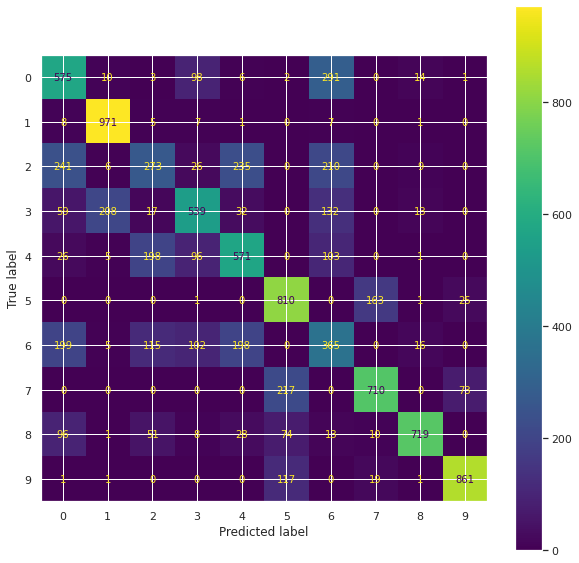



Confusion matrix:
[[732   0  15  35   5   2 202   0   9   0]
 [  7 968   0  21   2   0   2   0   0   0]
 [ 36   3 693  17 128   0 120   0   3   0]
 [ 74  13  30 842  27   0  11   0   3   0]
 [ 14   2 308  49 536   0  89   0   2   0]
 [  0   0   0   1   0 946   0  40   2  11]
 [243   3 197  49 104   0 393   0  11   0]
 [  0   0   0   0   0  48   0 918   0  34]
 [ 11   0   3   2   3   2   2   4 973   0]
 [  0   0   1   0   0  51   0  40   0 908]]


In [ ]:
# Creando visualizacion de la matriz de confusion
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(SVC_model_4, x_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

print("\n")

print(f"Confusion matrix:\n{confusion_matrix(y_test, predicted)}")

**Análisis:** podemos observar de forma rápida que la etiqueta 1 (pantalón) es en el que suceden la mayor cantidad de aciertos (tal y como indicamos en el punto anterior), mientras que las predicciones más pobres son realizadas por la etiqueta 6 (camisa/camiseta).

**Conclusiones:** se pudo con los modelos planteados que las máquinas de Soporte Vectorial retornan buenos resultados cuando se tiene una gran cantidad de datos, pero hay que utilizar un cross validation pequeño (diferente de 1 y 2) ya que sino se puede durar demasiado tiempo entrenando el modelo. Idealmente se tendría que utilizar un cross validation de 10, pero con 5 está bien y con 3 es descente. 

También se puede ver que los mejores resultados son los que arroja el kernel gaussiano o RBF, ya que el lineal no es el más óptimo y a nivel computacional tarda más tiempo, esto se pudo comparar con los dos datasets usados ya en que en los dos el kernel gaussiano fue el que dio los mejores resultados y en el menor tiempo.

Es importante aclarar que los resultados aquí planteados pueden mejorarse si se cuenta con un servidor dedicado con varios clústers de procesamiento en paralelo, pero dado a que solo se cuenta con el servicio gratis no fue posisble utilizar más recursos. 